In [1]:
from qiskit import QuantumCircuit, transpile
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from IPython.display import display

In [2]:
def oracle(circuit, data_reg, y_reg, is_balanced=True):
    if is_balanced:
        circuit.cx(data_reg[0], y_reg)
        circuit.cx(data_reg[1], y_reg)
    return circuit

In [3]:
def deutsch_jozsa_game(domain_size=4, copies=1000):
    # Step 1: Decide if the oracle will be balanced or constant
    is_balanced = random.choice([True, False])

    # Step 2: Explain the rules to the player
    print("Welcome to 'The Oracle's Secret'!")
    print("You need to figure out if the oracle is balanced or constant.")
    print("Balanced means the oracle returns 0 for half the inputs and 1 for the other half.")
    print("Constant means the oracle returns the same value for all inputs.")
    
    # Ask the player to guess
    player_guess = input("What's your guess? (balanced/constant): ").strip().lower()

    # Set up the quantum circuit
    reqd_num_qubits = int(np.ceil(np.log2(domain_size)))
    circuit = QuantumCircuit(reqd_num_qubits + 1, reqd_num_qubits)
    data_reg = list(range(reqd_num_qubits))
    y_reg = reqd_num_qubits

    # Step 1: Put the input qubits into an equal superposition state
    circuit.h(data_reg)

    # Step 2: Prepare the target qubit in the |-⟩ state
    circuit.x(y_reg)
    circuit.h(y_reg)

    # Display the circuit after initialization
    print("\nCircuit after initialization (superposition and target preparation):")
    display(circuit.draw('mpl'))

    # Step 3: Apply the Oracle
    circuit = oracle(circuit, data_reg, y_reg, is_balanced)

    # Display the circuit after applying the oracle
    print("\nCircuit after applying the Oracle:")
    display(circuit.draw('mpl'))

    # Step 4: Apply Hadamard transform on each of the input qubits again
    circuit.h(data_reg)

    # Step 5: Measure the input qubits
    circuit.measure(data_reg, data_reg)

    # Display the final circuit before simulation
    print("\nFinal Circuit before measurement:")
    display(circuit.draw('mpl'))

    
    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=copies)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    # Determine if the oracle was balanced or constant based on the measurement
    if '0' * reqd_num_qubits in counts:
        algorithm_guess = "constant"
    else:
        algorithm_guess = "balanced"

    # Display results
    print(f"Quantum algorithm determined the oracle is {algorithm_guess}.")
    print(f"The oracle was actually {('balanced' if is_balanced else 'constant')}.")
    print(f"Your guess was {player_guess}.")
    
    if player_guess == algorithm_guess:
        print("Congratulations! Your guess matches the quantum algorithm's result!")
    else:
        print("The quantum algorithm outperformed your guess. Better luck next time!")
    # Display the histogram
    print("\nHistogram of measurement results:")
    for bitstring, count in counts.items():
        print(f"{bitstring}: {count}")
    
    plot_histogram(counts).show()

Welcome to 'The Oracle's Secret'!
You need to figure out if the oracle is balanced or constant.
Balanced means the oracle returns 0 for half the inputs and 1 for the other half.
Constant means the oracle returns the same value for all inputs.


What's your guess? (balanced/constant):  balanced



Circuit after initialization (superposition and target preparation):


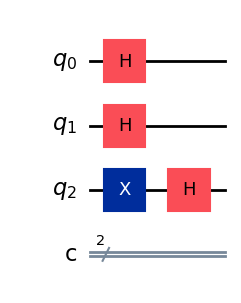


Circuit after applying the Oracle:


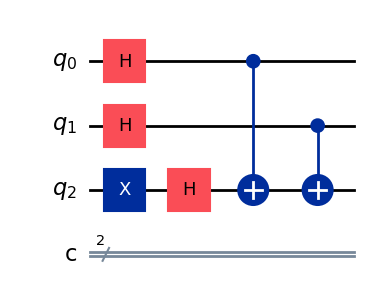


Final Circuit before measurement:


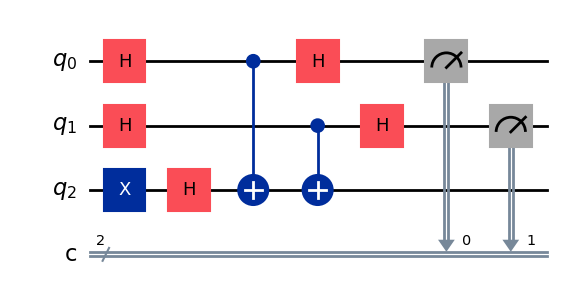

Quantum algorithm determined the oracle is balanced.
The oracle was actually balanced.
Your guess was balanced.
Congratulations! Your guess matches the quantum algorithm's result!

Histogram of measurement results:
11: 1000


In [4]:
if __name__ == '__main__':
    deutsch_jozsa_game()